In [11]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#1 and 2. Loading Data and Converting "PassengerId" index column

data = pd.read_csv(r"F:\DSA\Data Sets ICT\titanic_dataset.csv", index_col = 'PassengerId')

In [23]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [24]:
#3. Checking Basic details

data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [26]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


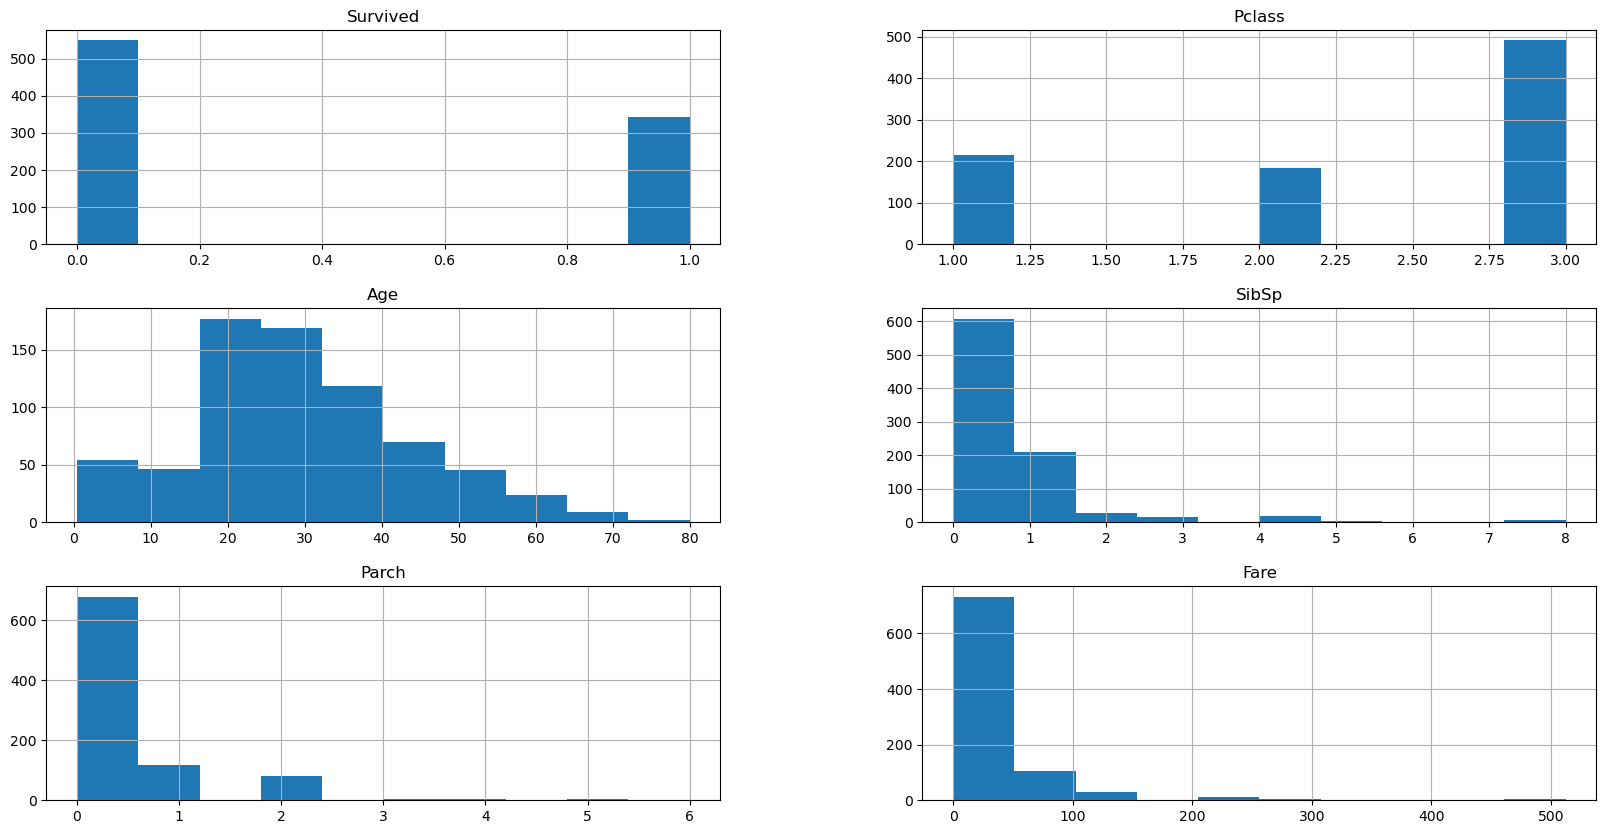

In [27]:
graphs = data.select_dtypes(include = ['int64', 'float64'])
graphs.hist(figsize = (20,10))
plt.show()

In [ ]:
#4. Filling missing data

In [28]:
#Age group distribution is center skewed. Mean filling is taken up.

data['Age'] = data['Age'].fillna(data['Age'].mean())

In [29]:
#Cabin Data is irrelevant for this analysis and henceforth dropped.

data.drop('Cabin', axis = 1, inplace = True)

In [32]:
#Mode data is used to fill the missing 2 values

data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [33]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


In [34]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [43]:
#5. Handling Outliers in 3 columns, Age, Fare, Parch and SibSp using Z Score

from scipy import stats

z_scores = np.abs(stats.zscore(data[['Age', 'Fare', 'SibSp', 'Parch']]))
data_new = data[(z_scores < 3).all(axis=1)] #All rows with the Outliers are omitted and return the new DF

In [44]:
data_new

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


In [46]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 820 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  820 non-null    int64  
 1   Pclass    820 non-null    int64  
 2   Name      820 non-null    object 
 3   Sex       820 non-null    object 
 4   Age       820 non-null    float64
 5   SibSp     820 non-null    int64  
 6   Parch     820 non-null    int64  
 7   Ticket    820 non-null    object 
 8   Fare      820 non-null    float64
 9   Embarked  820 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 70.5+ KB


In [47]:
#5. Min Max scaling on the feature set with ‘Survived’ as target.

num_cols = data_new.select_dtypes(include=['float64', 'int64']).columns
x = data_new[num_cols].drop('Survived', axis=1)
minmax = sk.MinMaxScaler()
x_minmax = minmax.fit_transform(x)
x_minmax = pd.DataFrame(x)
x_minmax.describe()

,Pclass,Age,SibSp,Parch,Fare
count,820.000000,820.000000,820.000000,820.000000,820.000000
mean,2.310976,29.792831,0.348780,0.254878,25.836051
std,0.826678,12.151418,0.619434,0.565308,29.817529
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,29.699118,0.000000,0.000000,13.000000
75%,3.000000,35.000000,1.000000,0.000000,27.000000
max,3.000000,66.000000,3.000000,2.000000,164.866700


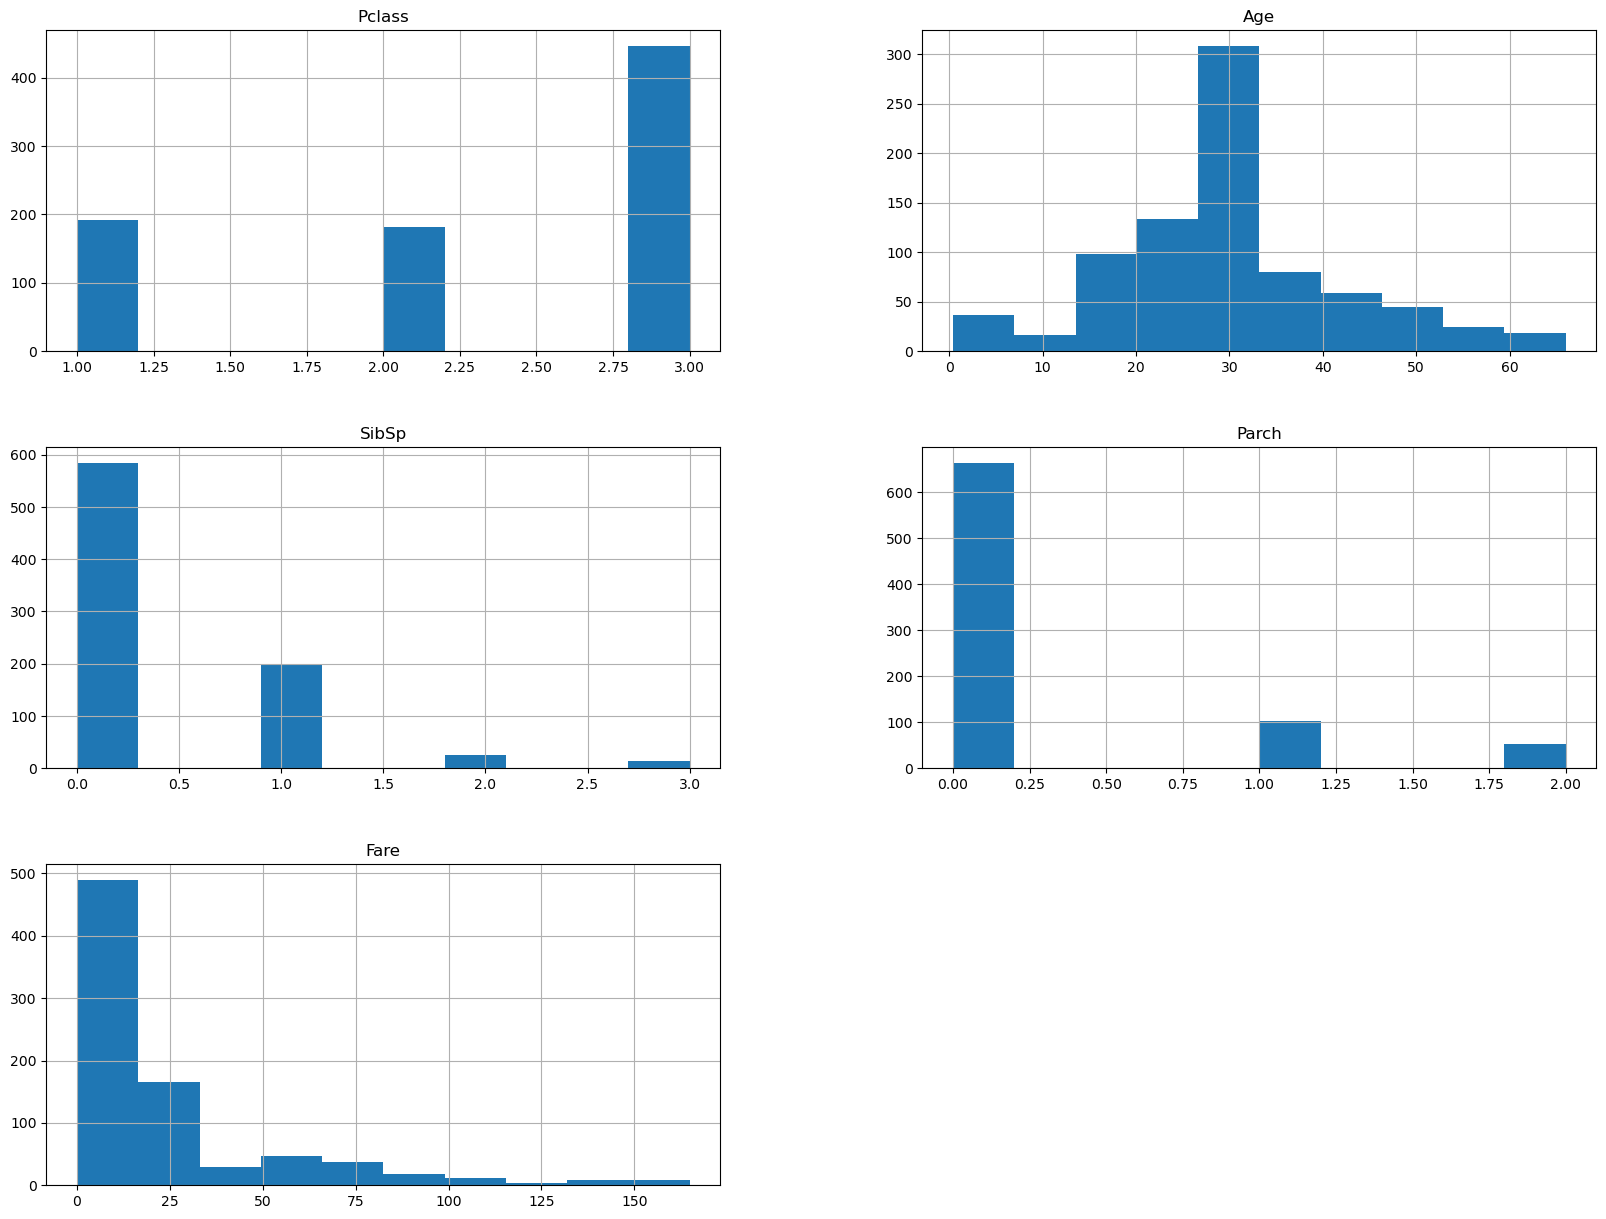

In [50]:
x_minmax.hist(figsize = (20,15))
plt.show()